# Description

This notebook runs some pre-analyses using spectral clustering to explore the best set of parameters to cluster `z_score_std` data version.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 30000

# Z-score standardized data

In [6]:
INPUT_SUBSET = "z_score_std"

In [7]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [9]:
data = pd.read_pickle(input_filepath)

In [10]:
data.shape

(3749, 987)

In [11]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.553743,1.851060,-0.095721,0.931603,-0.515196,1.371264,-0.413165,0.729668,0.546338,0.901153,...,1.148776,1.649018,-1.375952,2.203063,0.810199,-0.987048,0.277710,-0.607613,0.572376,-0.660846
100002_raw-Energy,-1.313905,-0.421015,-0.310524,-0.201978,0.233028,0.693838,0.084129,0.572439,0.217866,1.296973,...,0.165430,0.799276,-0.361989,-0.008253,2.063780,-0.930765,-0.147007,1.601938,-0.273553,-0.560822
100003_raw-Protein,-0.645622,-0.997845,0.249039,0.256499,0.422357,0.829189,-0.169004,0.511550,0.002389,-0.057200,...,1.016791,1.019488,-2.148844,-0.065130,0.041052,-0.836118,-0.320571,1.325519,-0.341494,-0.495786
100004_raw-Fat,-0.913924,-1.837183,0.012095,-1.301315,0.205794,1.129114,0.019985,0.376660,-0.810272,0.843611,...,0.544266,0.576714,0.281731,-0.218963,1.258957,-1.131924,0.378545,0.842047,-0.622194,-0.160058
100005_raw-Carbohydrate,-0.523004,0.131379,-0.097802,-0.030526,-0.021500,-0.219116,0.668229,0.365700,1.102347,0.845625,...,-0.344740,0.079274,0.253427,0.236474,1.033895,-0.229105,0.364793,1.776714,0.190531,-1.459641


# Clustering

In [12]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

## `gamma` parameter

### Using default value (`gamma=1.0`)

In [13]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-2,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=1.00,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX


In [14]:
# show number of clusters and their size
pd.Series(part).value_counts()

0    3749
dtype: int64

The algorithm does not work with the default `gamma=1.0`. Other values for this parameter should be explored.

### Using `gamma=0.01`

In [15]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=0.01,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

In [16]:
# show number of clusters and their size
pd.Series(part).value_counts()

0    3748
1       1
dtype: int64

For values around `gamma=0.01` the algorithm takes a lot of time to converge (here I used `eigen_tol=1e-03` to force convergence).

### Using `gamma=0.001`

In [17]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=0.001,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

In [18]:
# show number of clusters and their size
pd.Series(part).value_counts()

0    3747
1       2
dtype: int64

In [19]:
# From sklearn website:
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample has been assigned to the wrong cluster,
# as a different cluster is more similar
silhouette_score(data, part)

0.6144958831623549

In [20]:
# From sklearn website:
# The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion
calinski_harabasz_score(data, part)

22.767909596877978

For values around `gamma=0.001` now the algorithm converges. This suggests smaller values should be explored for this parameter.

## Extended test

In [21]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_RANGE"] = [2, 4, 6, 8, 10, 20, 30, 40, 50, 60]
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["GAMMAS"] = [
    1e-03,
    #     1e-04,
    #     1e-05,
    1e-05,
    #     1e-06,
    #     1e-07,
    #     1e-08,
    #     1e-09,
    1e-10,
    #     1e-11,
    #     1e-12,
    #     1e-13,
    #     1e-14,
    1e-15,
    1e-17,
    1e-20,
    1e-30,
    1e-40,
    1e-50,
]
CLUSTERING_OPTIONS["AFFINITY"] = "rbf"

display(CLUSTERING_OPTIONS)

{'K_RANGE': [2, 4, 6, 8, 10, 20, 30, 40, 50, 60],
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'GAMMAS': [0.001, 1e-05, 1e-10, 1e-15, 1e-17, 1e-20, 1e-30, 1e-40, 1e-50],
 'AFFINITY': 'rbf'}

In [22]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in CLUSTERING_OPTIONS["K_RANGE"]:
    for gamma_value in CLUSTERING_OPTIONS["GAMMAS"]:
        for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
            clus = SpectralClustering(
                eigen_solver="arpack",
                n_clusters=k,
                n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
                affinity=CLUSTERING_OPTIONS["AFFINITY"],
                gamma=gamma_value,
                random_state=random_state,
            )

            method_name = type(clus).__name__
            CLUSTERERS[f"{method_name} #{idx}"] = clus

            random_state = random_state + 1
            idx = idx + 1

In [23]:
display(len(CLUSTERERS))

450

In [24]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('SpectralClustering #0',
 SpectralClustering(eigen_solver='arpack', gamma=0.001, n_clusters=2,
                    random_state=30000))

('SpectralClustering #1',
 SpectralClustering(eigen_solver='arpack', gamma=0.001, n_clusters=2,
                    random_state=30001))

In [25]:
clustering_method_name = method_name
display(clustering_method_name)

'SpectralClustering'

## Generate ensemble

In [26]:
import tempfile
from clustering.ensemble import generate_ensemble

In [27]:
# generate a temporary folder where to store the ensemble and avoid computing it again
ensemble_folder = Path(
    tempfile.gettempdir(),
    f"pre_cluster_analysis",
    clustering_method_name,
).resolve()
ensemble_folder.mkdir(parents=True, exist_ok=True)

In [28]:
ensemble_file = Path(
    ensemble_folder,
    generate_result_set_name(
        CLUSTERING_OPTIONS, prefix=f"ensemble-{INPUT_SUBSET}-", suffix=".pkl"
    ),
)
display(ensemble_file)

PosixPath('/tmp/pre_cluster_analysis/SpectralClustering/ensemble-z_score_std-AFFINITY_rbf-GAMMAS_0001_1e_05_1e_10_1e_15_1e_17_1e_20_1e_30_1e_40_1e_50-KMEANS_N_INIT_10-K_RANGE_2_4_6_8_10_20_30_40_50_60-N_REPS_PER_K_5.pkl')

In [29]:
if ensemble_file.exists():
    display(f"Ensemble file exists")
    ensemble = pd.read_pickle(ensemble_file)
else:
    ensemble = generate_ensemble(
        data,
        CLUSTERERS,
        attributes=["n_clusters", "gamma"],
    )

    ensemble.to_pickle(ensemble_file)

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 1/450 [00:01<10:01,  1.34s/it]

  0%|          | 2/450 [00:02<10:00,  1.34s/it]

  1%|          | 3/450 [00:04<09:59,  1.34s/it]

  1%|          | 4/450 [00:05<09:59,  1.34s/it]

  1%|          | 5/450 [00:06<09:59,  1.35s/it]

  1%|▏         | 6/450 [00:07<09:44,  1.32s/it]

  2%|▏         | 7/450 [00:09<09:35,  1.30s/it]

  2%|▏         | 8/450 [00:10<09:26,  1.28s/it]

  2%|▏         | 9/450 [00:11<09:20,  1.27s/it]

  2%|▏         | 10/450 [00:12<09:15,  1.26s/it]

  2%|▏         | 11/450 [00:14<09:13,  1.26s/it]

  3%|▎         | 12/450 [00:15<09:10,  1.26s/it]

  3%|▎         | 13/450 [00:16<09:08,  1.25s/it]

  3%|▎         | 14/450 [00:17<09:05,  1.25s/it]

  3%|▎         | 15/450 [00:19<09:04,  1.25s/it]

  4%|▎         | 16/450 [00:20<09:01,  1.25s/it]

  4%|▍         | 17/450 [00:21<08:59,  1.25s/it]

  4%|▍         | 18/450 [00:22<08:57,  1.24s/it]

  4%|▍         | 19/450 [00:24<08:56,  1.24s/it]

  4%|▍         | 20/450 [00:25<08:54,  1.24s/it]

  5%|▍         | 21/450 [00:26<08:56,  1.25s/it]

  5%|▍         | 22/450 [00:27<08:56,  1.25s/it]

  5%|▌         | 23/450 [00:29<08:57,  1.26s/it]

  5%|▌         | 24/450 [00:30<08:53,  1.25s/it]

  6%|▌         | 25/450 [00:31<08:54,  1.26s/it]

  6%|▌         | 26/450 [00:32<08:40,  1.23s/it]

  6%|▌         | 27/450 [00:34<08:31,  1.21s/it]

  6%|▌         | 28/450 [00:35<08:35,  1.22s/it]

  6%|▋         | 29/450 [00:36<08:26,  1.20s/it]

  7%|▋         | 30/450 [00:37<08:20,  1.19s/it]

  7%|▋         | 31/450 [00:38<08:14,  1.18s/it]

  7%|▋         | 32/450 [00:39<08:13,  1.18s/it]

  7%|▋         | 33/450 [00:41<08:11,  1.18s/it]

  8%|▊         | 34/450 [00:42<08:09,  1.18s/it]

  8%|▊         | 35/450 [00:43<08:07,  1.18s/it]

  8%|▊         | 36/450 [00:44<08:05,  1.17s/it]

  8%|▊         | 37/450 [00:45<08:16,  1.20s/it]

  8%|▊         | 38/450 [00:47<08:11,  1.19s/it]

  9%|▊         | 39/450 [00:48<08:09,  1.19s/it]

  9%|▉         | 40/450 [00:49<08:05,  1.18s/it]

  9%|▉         | 41/450 [00:50<08:01,  1.18s/it]

  9%|▉         | 42/450 [00:51<07:59,  1.18s/it]

 10%|▉         | 43/450 [00:52<07:56,  1.17s/it]

 10%|▉         | 44/450 [00:54<07:53,  1.17s/it]

 10%|█         | 45/450 [00:55<07:53,  1.17s/it]

 10%|█         | 46/450 [00:56<08:46,  1.30s/it]

 10%|█         | 47/450 [00:58<09:24,  1.40s/it]

 11%|█         | 48/450 [01:00<10:01,  1.50s/it]

 11%|█         | 49/450 [01:01<09:58,  1.49s/it]

 11%|█         | 50/450 [01:03<10:05,  1.51s/it]

 11%|█▏        | 51/450 [01:04<09:44,  1.47s/it]

 12%|█▏        | 52/450 [01:06<09:38,  1.45s/it]

 12%|█▏        | 53/450 [01:07<09:23,  1.42s/it]

 12%|█▏        | 54/450 [01:08<09:41,  1.47s/it]

 12%|█▏        | 55/450 [01:10<10:07,  1.54s/it]

 12%|█▏        | 56/450 [01:12<09:50,  1.50s/it]

 13%|█▎        | 57/450 [01:13<10:15,  1.57s/it]

 13%|█▎        | 58/450 [01:15<09:54,  1.52s/it]

 13%|█▎        | 59/450 [01:16<09:41,  1.49s/it]

 13%|█▎        | 60/450 [01:17<09:24,  1.45s/it]

 14%|█▎        | 61/450 [01:19<10:05,  1.56s/it]

 14%|█▍        | 62/450 [01:21<10:32,  1.63s/it]

 14%|█▍        | 63/450 [01:22<09:48,  1.52s/it]

 14%|█▍        | 64/450 [01:24<10:26,  1.62s/it]

 14%|█▍        | 65/450 [01:26<10:27,  1.63s/it]

 15%|█▍        | 66/450 [01:28<10:57,  1.71s/it]

 15%|█▍        | 67/450 [01:29<10:32,  1.65s/it]

 15%|█▌        | 68/450 [01:31<10:53,  1.71s/it]

 15%|█▌        | 69/450 [01:33<10:30,  1.66s/it]

 16%|█▌        | 70/450 [01:34<10:34,  1.67s/it]

 16%|█▌        | 71/450 [01:36<10:27,  1.65s/it]

 16%|█▌        | 72/450 [01:37<09:42,  1.54s/it]

 16%|█▌        | 73/450 [01:39<09:14,  1.47s/it]

 16%|█▋        | 74/450 [01:40<09:02,  1.44s/it]

 17%|█▋        | 75/450 [01:41<08:32,  1.37s/it]

 17%|█▋        | 76/450 [01:43<08:35,  1.38s/it]

 17%|█▋        | 77/450 [01:44<08:15,  1.33s/it]

 17%|█▋        | 78/450 [01:46<09:12,  1.49s/it]

 18%|█▊        | 79/450 [01:47<09:43,  1.57s/it]

 18%|█▊        | 80/450 [01:49<09:09,  1.48s/it]

 18%|█▊        | 81/450 [01:50<08:35,  1.40s/it]

 18%|█▊        | 82/450 [01:51<08:13,  1.34s/it]

 18%|█▊        | 83/450 [01:53<08:23,  1.37s/it]

 19%|█▊        | 84/450 [01:54<08:01,  1.31s/it]

 19%|█▉        | 85/450 [01:55<08:20,  1.37s/it]

 19%|█▉        | 86/450 [01:56<08:04,  1.33s/it]

 19%|█▉        | 87/450 [01:58<08:06,  1.34s/it]

 20%|█▉        | 88/450 [01:59<08:00,  1.33s/it]

 20%|█▉        | 89/450 [02:01<08:38,  1.44s/it]

 20%|██        | 90/450 [02:02<08:39,  1.44s/it]

 20%|██        | 91/450 [02:04<08:58,  1.50s/it]

 20%|██        | 92/450 [02:06<09:41,  1.62s/it]

 21%|██        | 93/450 [02:08<09:57,  1.67s/it]

 21%|██        | 94/450 [02:09<09:42,  1.64s/it]

 21%|██        | 95/450 [02:11<09:38,  1.63s/it]

 21%|██▏       | 96/450 [02:13<09:54,  1.68s/it]

 22%|██▏       | 97/450 [02:14<09:32,  1.62s/it]

 22%|██▏       | 98/450 [02:16<09:29,  1.62s/it]

 22%|██▏       | 99/450 [02:18<10:01,  1.71s/it]

 22%|██▏       | 100/450 [02:20<10:31,  1.80s/it]

 22%|██▏       | 101/450 [02:21<09:41,  1.67s/it]

 23%|██▎       | 102/450 [02:22<09:20,  1.61s/it]

 23%|██▎       | 103/450 [02:24<08:51,  1.53s/it]

 23%|██▎       | 104/450 [02:26<09:18,  1.61s/it]

 23%|██▎       | 105/450 [02:27<08:59,  1.56s/it]

 24%|██▎       | 106/450 [02:29<09:23,  1.64s/it]

 24%|██▍       | 107/450 [02:31<09:39,  1.69s/it]

 24%|██▍       | 108/450 [02:32<09:38,  1.69s/it]

 24%|██▍       | 109/450 [02:34<09:38,  1.70s/it]

 24%|██▍       | 110/450 [02:35<09:10,  1.62s/it]

 25%|██▍       | 111/450 [02:38<09:54,  1.76s/it]

 25%|██▍       | 112/450 [02:39<10:01,  1.78s/it]

 25%|██▌       | 113/450 [02:41<10:24,  1.85s/it]

 25%|██▌       | 114/450 [02:43<09:35,  1.71s/it]

 26%|██▌       | 115/450 [02:45<09:33,  1.71s/it]

 26%|██▌       | 116/450 [02:46<09:00,  1.62s/it]

 26%|██▌       | 117/450 [02:48<09:02,  1.63s/it]

 26%|██▌       | 118/450 [02:49<08:23,  1.52s/it]

 26%|██▋       | 119/450 [02:50<08:06,  1.47s/it]

 27%|██▋       | 120/450 [02:52<07:58,  1.45s/it]

 27%|██▋       | 121/450 [02:53<07:58,  1.45s/it]

 27%|██▋       | 122/450 [02:54<07:38,  1.40s/it]

 27%|██▋       | 123/450 [02:56<07:37,  1.40s/it]

 28%|██▊       | 124/450 [02:58<08:38,  1.59s/it]

 28%|██▊       | 125/450 [02:59<08:38,  1.60s/it]

 28%|██▊       | 126/450 [03:01<08:09,  1.51s/it]

 28%|██▊       | 127/450 [03:02<07:49,  1.45s/it]

 28%|██▊       | 128/450 [03:04<08:02,  1.50s/it]

 29%|██▊       | 129/450 [03:05<07:53,  1.47s/it]

 29%|██▉       | 130/450 [03:07<08:01,  1.51s/it]

 29%|██▉       | 131/450 [03:08<08:08,  1.53s/it]

 29%|██▉       | 132/450 [03:10<07:47,  1.47s/it]

 30%|██▉       | 133/450 [03:11<07:35,  1.44s/it]

 30%|██▉       | 134/450 [03:12<07:15,  1.38s/it]

 30%|███       | 135/450 [03:14<07:27,  1.42s/it]

 30%|███       | 136/450 [03:16<08:11,  1.56s/it]

 30%|███       | 137/450 [03:17<08:18,  1.59s/it]

 31%|███       | 138/450 [03:19<08:44,  1.68s/it]

 31%|███       | 139/450 [03:21<08:29,  1.64s/it]

 31%|███       | 140/450 [03:22<08:30,  1.65s/it]

 31%|███▏      | 141/450 [03:24<08:20,  1.62s/it]

 32%|███▏      | 142/450 [03:25<08:21,  1.63s/it]

 32%|███▏      | 143/450 [03:27<08:47,  1.72s/it]

 32%|███▏      | 144/450 [03:29<08:30,  1.67s/it]

 32%|███▏      | 145/450 [03:30<08:11,  1.61s/it]

 32%|███▏      | 146/450 [03:32<07:49,  1.55s/it]

 33%|███▎      | 147/450 [03:33<07:32,  1.49s/it]

 33%|███▎      | 148/450 [03:35<08:02,  1.60s/it]

 33%|███▎      | 149/450 [03:36<07:41,  1.53s/it]

 33%|███▎      | 150/450 [03:38<07:29,  1.50s/it]

 34%|███▎      | 151/450 [03:39<07:14,  1.45s/it]

 34%|███▍      | 152/450 [03:41<07:02,  1.42s/it]

 34%|███▍      | 153/450 [03:42<07:36,  1.54s/it]

 34%|███▍      | 154/450 [03:44<07:47,  1.58s/it]

 34%|███▍      | 155/450 [03:46<08:17,  1.69s/it]

 35%|███▍      | 156/450 [03:48<08:58,  1.83s/it]

 35%|███▍      | 157/450 [03:50<09:29,  1.94s/it]

 35%|███▌      | 158/450 [03:52<08:51,  1.82s/it]

 35%|███▌      | 159/450 [03:54<09:23,  1.94s/it]

 36%|███▌      | 160/450 [03:56<09:00,  1.86s/it]

 36%|███▌      | 161/450 [03:57<08:22,  1.74s/it]

 36%|███▌      | 162/450 [03:59<07:53,  1.64s/it]

 36%|███▌      | 163/450 [04:01<08:20,  1.74s/it]

 36%|███▋      | 164/450 [04:02<07:44,  1.63s/it]

 37%|███▋      | 165/450 [04:03<07:25,  1.56s/it]

 37%|███▋      | 166/450 [04:05<07:10,  1.51s/it]

 37%|███▋      | 167/450 [04:06<06:54,  1.47s/it]

 37%|███▋      | 168/450 [04:08<06:57,  1.48s/it]

 38%|███▊      | 169/450 [04:10<07:43,  1.65s/it]

 38%|███▊      | 170/450 [04:12<08:16,  1.77s/it]

 38%|███▊      | 171/450 [04:14<08:34,  1.84s/it]

 38%|███▊      | 172/450 [04:16<08:47,  1.90s/it]

 38%|███▊      | 173/450 [04:17<08:05,  1.75s/it]

 39%|███▊      | 174/450 [04:19<07:43,  1.68s/it]

 39%|███▉      | 175/450 [04:20<07:35,  1.66s/it]

 39%|███▉      | 176/450 [04:22<07:22,  1.62s/it]

 39%|███▉      | 177/450 [04:24<07:42,  1.69s/it]

 40%|███▉      | 178/450 [04:25<07:32,  1.66s/it]

 40%|███▉      | 179/450 [04:27<07:09,  1.59s/it]

 40%|████      | 180/450 [04:28<06:52,  1.53s/it]

 40%|████      | 181/450 [04:30<07:03,  1.57s/it]

 40%|████      | 182/450 [04:32<07:25,  1.66s/it]

 41%|████      | 183/450 [04:33<07:36,  1.71s/it]

 41%|████      | 184/450 [04:35<07:40,  1.73s/it]

 41%|████      | 185/450 [04:37<07:40,  1.74s/it]

 41%|████▏     | 186/450 [04:39<07:51,  1.78s/it]

 42%|████▏     | 187/450 [04:41<08:26,  1.93s/it]

 42%|████▏     | 188/450 [04:43<08:14,  1.89s/it]

 42%|████▏     | 189/450 [04:45<07:47,  1.79s/it]

 42%|████▏     | 190/450 [04:47<08:03,  1.86s/it]

 42%|████▏     | 191/450 [04:48<07:33,  1.75s/it]

 43%|████▎     | 192/450 [04:50<07:11,  1.67s/it]

 43%|████▎     | 193/450 [04:51<07:23,  1.73s/it]

 43%|████▎     | 194/450 [04:53<07:04,  1.66s/it]

 43%|████▎     | 195/450 [04:54<06:49,  1.61s/it]

 44%|████▎     | 196/450 [04:56<06:41,  1.58s/it]

 44%|████▍     | 197/450 [04:57<06:30,  1.54s/it]

 44%|████▍     | 198/450 [04:59<07:14,  1.73s/it]

 44%|████▍     | 199/450 [05:01<07:19,  1.75s/it]

 44%|████▍     | 200/450 [05:03<07:10,  1.72s/it]

 45%|████▍     | 201/450 [05:05<06:57,  1.68s/it]

 45%|████▍     | 202/450 [05:06<06:53,  1.67s/it]

 45%|████▌     | 203/450 [05:08<07:31,  1.83s/it]

 45%|████▌     | 204/450 [05:10<07:25,  1.81s/it]

 46%|████▌     | 205/450 [05:12<07:09,  1.75s/it]

 46%|████▌     | 206/450 [05:13<06:46,  1.67s/it]

 46%|████▌     | 207/450 [05:15<06:51,  1.70s/it]

 46%|████▌     | 208/450 [05:17<06:46,  1.68s/it]

 46%|████▋     | 209/450 [05:18<06:20,  1.58s/it]

 47%|████▋     | 210/450 [05:20<06:54,  1.73s/it]

 47%|████▋     | 211/450 [05:22<07:20,  1.84s/it]

 47%|████▋     | 212/450 [05:24<06:49,  1.72s/it]

 47%|████▋     | 213/450 [05:26<07:14,  1.83s/it]

 48%|████▊     | 214/450 [05:28<07:44,  1.97s/it]

 48%|████▊     | 215/450 [05:30<07:48,  1.99s/it]

 48%|████▊     | 216/450 [05:32<07:40,  1.97s/it]

 48%|████▊     | 217/450 [05:34<07:53,  2.03s/it]

 48%|████▊     | 218/450 [05:36<07:10,  1.85s/it]

 49%|████▊     | 219/450 [05:37<06:51,  1.78s/it]

 49%|████▉     | 220/450 [05:39<07:01,  1.83s/it]

 49%|████▉     | 221/450 [05:41<06:41,  1.75s/it]

 49%|████▉     | 222/450 [05:42<06:25,  1.69s/it]

 50%|████▉     | 223/450 [05:44<06:23,  1.69s/it]

 50%|████▉     | 224/450 [05:46<06:25,  1.70s/it]

 50%|█████     | 225/450 [05:47<06:27,  1.72s/it]

 50%|█████     | 226/450 [05:50<06:58,  1.87s/it]

 50%|█████     | 227/450 [05:52<07:16,  1.96s/it]

 51%|█████     | 228/450 [05:54<07:50,  2.12s/it]

 51%|█████     | 229/450 [05:57<08:15,  2.24s/it]

 51%|█████     | 230/450 [05:59<08:08,  2.22s/it]

 51%|█████▏    | 231/450 [06:01<07:41,  2.11s/it]

 52%|█████▏    | 232/450 [06:03<07:22,  2.03s/it]

 52%|█████▏    | 233/450 [06:05<07:16,  2.01s/it]

 52%|█████▏    | 234/450 [06:07<07:25,  2.06s/it]

 52%|█████▏    | 235/450 [06:09<07:28,  2.09s/it]

 52%|█████▏    | 236/450 [06:11<07:07,  2.00s/it]

 53%|█████▎    | 237/450 [06:13<06:53,  1.94s/it]

 53%|█████▎    | 238/450 [06:14<06:42,  1.90s/it]

 53%|█████▎    | 239/450 [06:17<07:05,  2.02s/it]

 53%|█████▎    | 240/450 [06:19<07:12,  2.06s/it]

 54%|█████▎    | 241/450 [06:21<07:02,  2.02s/it]

 54%|█████▍    | 242/450 [06:23<06:45,  1.95s/it]

 54%|█████▍    | 243/450 [06:25<06:50,  1.98s/it]

 54%|█████▍    | 244/450 [06:26<06:38,  1.93s/it]

 54%|█████▍    | 245/450 [06:29<06:45,  1.98s/it]

 55%|█████▍    | 246/450 [06:31<07:24,  2.18s/it]

 55%|█████▍    | 247/450 [06:33<07:07,  2.11s/it]

 55%|█████▌    | 248/450 [06:35<06:53,  2.04s/it]

 55%|█████▌    | 249/450 [06:37<06:37,  1.98s/it]

 56%|█████▌    | 250/450 [06:39<06:32,  1.96s/it]

 56%|█████▌    | 251/450 [06:41<06:21,  1.92s/it]

 56%|█████▌    | 252/450 [06:43<06:39,  2.02s/it]

 56%|█████▌    | 253/450 [06:45<07:10,  2.19s/it]

 56%|█████▋    | 254/450 [06:47<06:49,  2.09s/it]

 57%|█████▋    | 255/450 [06:49<06:34,  2.02s/it]

 57%|█████▋    | 256/450 [06:51<06:34,  2.03s/it]

 57%|█████▋    | 257/450 [06:53<06:08,  1.91s/it]

 57%|█████▋    | 258/450 [06:55<06:33,  2.05s/it]

 58%|█████▊    | 259/450 [06:57<06:14,  1.96s/it]

 58%|█████▊    | 260/450 [06:59<06:41,  2.11s/it]

 58%|█████▊    | 261/450 [07:01<06:33,  2.08s/it]

 58%|█████▊    | 262/450 [07:03<06:06,  1.95s/it]

 58%|█████▊    | 263/450 [07:05<05:58,  1.92s/it]

 59%|█████▊    | 264/450 [07:07<06:30,  2.10s/it]

 59%|█████▉    | 265/450 [07:09<06:13,  2.02s/it]

 59%|█████▉    | 266/450 [07:12<06:38,  2.17s/it]

 59%|█████▉    | 267/450 [07:14<06:21,  2.08s/it]

 60%|█████▉    | 268/450 [07:16<06:13,  2.05s/it]

 60%|█████▉    | 269/450 [07:18<06:42,  2.22s/it]

 60%|██████    | 270/450 [07:20<06:35,  2.20s/it]

 60%|██████    | 271/450 [07:24<07:36,  2.55s/it]

 60%|██████    | 272/450 [07:27<08:22,  2.82s/it]

 61%|██████    | 273/450 [07:31<08:59,  3.05s/it]

 61%|██████    | 274/450 [07:34<09:29,  3.24s/it]

 61%|██████    | 275/450 [07:38<09:36,  3.29s/it]

 61%|██████▏   | 276/450 [07:41<09:39,  3.33s/it]

 62%|██████▏   | 277/450 [07:45<09:40,  3.36s/it]

 62%|██████▏   | 278/450 [07:48<09:21,  3.26s/it]

 62%|██████▏   | 279/450 [07:51<09:25,  3.31s/it]

 62%|██████▏   | 280/450 [07:55<09:25,  3.33s/it]

 62%|██████▏   | 281/450 [07:58<09:22,  3.33s/it]

 63%|██████▎   | 282/450 [08:01<09:13,  3.30s/it]

 63%|██████▎   | 283/450 [08:04<08:59,  3.23s/it]

 63%|██████▎   | 284/450 [08:07<08:54,  3.22s/it]

 63%|██████▎   | 285/450 [08:11<08:50,  3.21s/it]

 64%|██████▎   | 286/450 [08:14<08:37,  3.15s/it]

 64%|██████▍   | 287/450 [08:17<08:35,  3.16s/it]

 64%|██████▍   | 288/450 [08:20<08:22,  3.10s/it]

 64%|██████▍   | 289/450 [08:23<08:13,  3.06s/it]

 64%|██████▍   | 290/450 [08:26<08:22,  3.14s/it]

 65%|██████▍   | 291/450 [08:29<08:20,  3.15s/it]

 65%|██████▍   | 292/450 [08:32<08:13,  3.12s/it]

 65%|██████▌   | 293/450 [08:35<08:13,  3.14s/it]

 65%|██████▌   | 294/450 [08:38<08:03,  3.10s/it]

 66%|██████▌   | 295/450 [08:42<08:00,  3.10s/it]

 66%|██████▌   | 296/450 [08:44<07:46,  3.03s/it]

 66%|██████▌   | 297/450 [08:47<07:15,  2.84s/it]

 66%|██████▌   | 298/450 [08:50<07:14,  2.86s/it]

 66%|██████▋   | 299/450 [08:52<06:57,  2.77s/it]

 67%|██████▋   | 300/450 [08:55<07:07,  2.85s/it]

 67%|██████▋   | 301/450 [08:58<06:55,  2.79s/it]

 67%|██████▋   | 302/450 [09:01<07:08,  2.90s/it]

 67%|██████▋   | 303/450 [09:04<07:06,  2.90s/it]

 68%|██████▊   | 304/450 [09:07<07:11,  2.96s/it]

 68%|██████▊   | 305/450 [09:10<07:10,  2.97s/it]

 68%|██████▊   | 306/450 [09:13<07:09,  2.98s/it]

 68%|██████▊   | 307/450 [09:16<06:54,  2.90s/it]

 68%|██████▊   | 308/450 [09:19<06:59,  2.96s/it]

 69%|██████▊   | 309/450 [09:22<07:00,  2.98s/it]

 69%|██████▉   | 310/450 [09:25<06:55,  2.97s/it]

 69%|██████▉   | 311/450 [09:28<06:56,  3.00s/it]

 69%|██████▉   | 312/450 [09:31<06:51,  2.98s/it]

 70%|██████▉   | 313/450 [09:34<06:39,  2.91s/it]

 70%|██████▉   | 314/450 [09:37<06:35,  2.91s/it]

 70%|███████   | 315/450 [09:40<06:39,  2.96s/it]

 70%|███████   | 316/450 [09:45<07:54,  3.54s/it]

 70%|███████   | 317/450 [09:49<08:37,  3.89s/it]

 71%|███████   | 318/450 [09:54<09:15,  4.21s/it]

 71%|███████   | 319/450 [09:59<09:47,  4.48s/it]

 71%|███████   | 320/450 [10:04<10:00,  4.62s/it]

 71%|███████▏  | 321/450 [10:08<09:30,  4.42s/it]

 72%|███████▏  | 322/450 [10:12<09:08,  4.28s/it]

 72%|███████▏  | 323/450 [10:16<08:51,  4.18s/it]

 72%|███████▏  | 324/450 [10:20<08:37,  4.11s/it]

 72%|███████▏  | 325/450 [10:24<08:26,  4.05s/it]

 72%|███████▏  | 326/450 [10:28<08:08,  3.94s/it]

 73%|███████▎  | 327/450 [10:31<07:54,  3.86s/it]

 73%|███████▎  | 328/450 [10:35<07:43,  3.80s/it]

 73%|███████▎  | 329/450 [10:39<07:43,  3.83s/it]

 73%|███████▎  | 330/450 [10:43<07:36,  3.80s/it]

 74%|███████▎  | 331/450 [10:47<07:41,  3.88s/it]

 74%|███████▍  | 332/450 [10:50<07:27,  3.79s/it]

 74%|███████▍  | 333/450 [10:54<07:14,  3.71s/it]

 74%|███████▍  | 334/450 [10:58<07:17,  3.77s/it]

 74%|███████▍  | 335/450 [11:01<07:13,  3.77s/it]

 75%|███████▍  | 336/450 [11:05<07:04,  3.72s/it]

 75%|███████▍  | 337/450 [11:09<06:57,  3.69s/it]

 75%|███████▌  | 338/450 [11:13<07:01,  3.76s/it]

 75%|███████▌  | 339/450 [11:16<06:53,  3.72s/it]

 76%|███████▌  | 340/450 [11:20<06:39,  3.63s/it]

 76%|███████▌  | 341/450 [11:23<06:30,  3.59s/it]

 76%|███████▌  | 342/450 [11:27<06:21,  3.53s/it]

 76%|███████▌  | 343/450 [11:30<06:16,  3.52s/it]

 76%|███████▋  | 344/450 [11:33<06:03,  3.43s/it]

 77%|███████▋  | 345/450 [11:37<05:56,  3.40s/it]

 77%|███████▋  | 346/450 [11:40<05:57,  3.44s/it]

 77%|███████▋  | 347/450 [11:44<05:54,  3.44s/it]

 77%|███████▋  | 348/450 [11:47<05:49,  3.43s/it]

 78%|███████▊  | 349/450 [11:51<05:49,  3.46s/it]

 78%|███████▊  | 350/450 [11:54<05:45,  3.46s/it]

 78%|███████▊  | 351/450 [11:57<05:43,  3.47s/it]

 78%|███████▊  | 352/450 [12:01<05:32,  3.39s/it]

 78%|███████▊  | 353/450 [12:04<05:30,  3.41s/it]

 79%|███████▊  | 354/450 [12:08<05:35,  3.49s/it]

 79%|███████▉  | 355/450 [12:11<05:29,  3.47s/it]

 79%|███████▉  | 356/450 [12:15<05:26,  3.48s/it]

 79%|███████▉  | 357/450 [12:18<05:19,  3.44s/it]

 80%|███████▉  | 358/450 [12:21<05:15,  3.43s/it]

 80%|███████▉  | 359/450 [12:24<04:59,  3.29s/it]

 80%|████████  | 360/450 [12:28<05:01,  3.35s/it]

 80%|████████  | 361/450 [12:35<06:41,  4.51s/it]

 80%|████████  | 362/450 [12:42<07:51,  5.36s/it]

 81%|████████  | 363/450 [12:50<08:40,  5.98s/it]

 81%|████████  | 364/450 [12:57<09:06,  6.35s/it]

 81%|████████  | 365/450 [13:05<09:27,  6.68s/it]

 81%|████████▏ | 366/450 [13:09<08:24,  6.00s/it]

 82%|████████▏ | 367/450 [13:13<07:36,  5.50s/it]

 82%|████████▏ | 368/450 [13:18<07:04,  5.18s/it]

 82%|████████▏ | 369/450 [13:22<06:41,  4.95s/it]

 82%|████████▏ | 370/450 [13:27<06:24,  4.81s/it]

 82%|████████▏ | 371/450 [13:31<06:09,  4.67s/it]

 83%|████████▎ | 372/450 [13:35<05:54,  4.54s/it]

 83%|████████▎ | 373/450 [13:40<05:43,  4.46s/it]

 83%|████████▎ | 374/450 [13:44<05:40,  4.48s/it]

 83%|████████▎ | 375/450 [13:48<05:30,  4.41s/it]

 84%|████████▎ | 376/450 [13:53<05:24,  4.39s/it]

 84%|████████▍ | 377/450 [13:57<05:22,  4.41s/it]

 84%|████████▍ | 378/450 [14:01<05:05,  4.24s/it]

 84%|████████▍ | 379/450 [14:05<04:56,  4.17s/it]

 84%|████████▍ | 380/450 [14:09<04:51,  4.17s/it]

 85%|████████▍ | 381/450 [14:13<04:47,  4.17s/it]

 85%|████████▍ | 382/450 [14:17<04:39,  4.12s/it]

 85%|████████▌ | 383/450 [14:21<04:32,  4.07s/it]

 85%|████████▌ | 384/450 [14:25<04:27,  4.05s/it]

 86%|████████▌ | 385/450 [14:29<04:20,  4.01s/it]

 86%|████████▌ | 386/450 [14:33<04:10,  3.91s/it]

 86%|████████▌ | 387/450 [14:37<04:04,  3.88s/it]

 86%|████████▌ | 388/450 [14:41<04:00,  3.88s/it]

 86%|████████▋ | 389/450 [14:44<03:56,  3.87s/it]

 87%|████████▋ | 390/450 [14:48<03:53,  3.89s/it]

 87%|████████▋ | 391/450 [14:52<03:50,  3.90s/it]

 87%|████████▋ | 392/450 [14:56<03:43,  3.86s/it]

 87%|████████▋ | 393/450 [15:00<03:40,  3.87s/it]

 88%|████████▊ | 394/450 [15:04<03:36,  3.87s/it]

 88%|████████▊ | 395/450 [15:08<03:30,  3.84s/it]

 88%|████████▊ | 396/450 [15:11<03:25,  3.81s/it]

 88%|████████▊ | 397/450 [15:15<03:20,  3.78s/it]

 88%|████████▊ | 398/450 [15:19<03:15,  3.76s/it]

 89%|████████▊ | 399/450 [15:23<03:15,  3.84s/it]

 89%|████████▉ | 400/450 [15:27<03:14,  3.89s/it]

 89%|████████▉ | 401/450 [15:31<03:10,  3.90s/it]

 89%|████████▉ | 402/450 [15:35<03:06,  3.88s/it]

 90%|████████▉ | 403/450 [15:38<03:02,  3.88s/it]

 90%|████████▉ | 404/450 [15:42<02:58,  3.89s/it]

 90%|█████████ | 405/450 [15:46<02:53,  3.85s/it]

 90%|█████████ | 406/450 [15:55<03:55,  5.34s/it]

 90%|█████████ | 407/450 [16:04<04:36,  6.44s/it]

 91%|█████████ | 408/450 [16:13<04:58,  7.11s/it]

 91%|█████████ | 409/450 [16:21<05:13,  7.65s/it]

 91%|█████████ | 410/450 [16:30<05:20,  8.01s/it]

 91%|█████████▏| 411/450 [16:35<04:38,  7.13s/it]

 92%|█████████▏| 412/450 [16:40<04:04,  6.44s/it]

 92%|█████████▏| 413/450 [16:45<03:41,  5.98s/it]

 92%|█████████▏| 414/450 [16:50<03:23,  5.65s/it]

 92%|█████████▏| 415/450 [16:55<03:09,  5.42s/it]

 92%|█████████▏| 416/450 [17:00<02:56,  5.19s/it]

 93%|█████████▎| 417/450 [17:04<02:46,  5.03s/it]

 93%|█████████▎| 418/450 [17:09<02:36,  4.90s/it]

 93%|█████████▎| 419/450 [17:14<02:30,  4.84s/it]

 93%|█████████▎| 420/450 [17:18<02:23,  4.79s/it]

 94%|█████████▎| 421/450 [17:23<02:18,  4.78s/it]

 94%|█████████▍| 422/450 [17:28<02:11,  4.71s/it]

 94%|█████████▍| 423/450 [17:32<02:07,  4.73s/it]

 94%|█████████▍| 424/450 [17:37<02:01,  4.66s/it]

 94%|█████████▍| 425/450 [17:42<01:56,  4.68s/it]

 95%|█████████▍| 426/450 [17:46<01:49,  4.56s/it]

 95%|█████████▍| 427/450 [17:50<01:44,  4.53s/it]

 95%|█████████▌| 428/450 [17:55<01:39,  4.50s/it]

 95%|█████████▌| 429/450 [17:59<01:32,  4.39s/it]

 96%|█████████▌| 430/450 [18:03<01:29,  4.45s/it]

 96%|█████████▌| 431/450 [18:08<01:23,  4.40s/it]

 96%|█████████▌| 432/450 [18:12<01:19,  4.41s/it]

 96%|█████████▌| 433/450 [18:16<01:13,  4.33s/it]

 96%|█████████▋| 434/450 [18:21<01:09,  4.36s/it]

 97%|█████████▋| 435/450 [18:25<01:04,  4.30s/it]

 97%|█████████▋| 436/450 [18:29<00:58,  4.21s/it]

 97%|█████████▋| 437/450 [18:33<00:54,  4.21s/it]

 97%|█████████▋| 438/450 [18:37<00:50,  4.18s/it]

 98%|█████████▊| 439/450 [18:41<00:45,  4.11s/it]

 98%|█████████▊| 440/450 [18:45<00:41,  4.13s/it]

 98%|█████████▊| 441/450 [18:50<00:37,  4.16s/it]

 98%|█████████▊| 442/450 [18:53<00:32,  4.10s/it]

 98%|█████████▊| 443/450 [18:58<00:29,  4.20s/it]

 99%|█████████▊| 444/450 [19:02<00:25,  4.19s/it]

 99%|█████████▉| 445/450 [19:07<00:21,  4.37s/it]

 99%|█████████▉| 446/450 [19:11<00:17,  4.34s/it]

 99%|█████████▉| 447/450 [19:15<00:12,  4.31s/it]

100%|█████████▉| 448/450 [19:20<00:08,  4.28s/it]

100%|█████████▉| 449/450 [19:24<00:04,  4.26s/it]

100%|██████████| 450/450 [19:28<00:00,  4.20s/it]

100%|██████████| 450/450 [19:28<00:00,  2.60s/it]

In [30]:
ensemble.shape

(450, 4)

In [31]:
ensemble.head()

,clusterer_params,partition,n_clusters,gamma
clusterer_id,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001


In [32]:
ensemble["gamma"] = ensemble["gamma"].apply(lambda x: f"{x:.1e}")

In [33]:
ensemble["n_clusters"].value_counts()

60    45
50    45
40    45
30    45
20    45
10    45
8     45
6     45
4     45
2     45
Name: n_clusters, dtype: int64

In [34]:
_tmp = ensemble["n_clusters"].value_counts().unique()
assert _tmp.shape[0] == 1
assert _tmp[0] == int(
    CLUSTERING_OPTIONS["N_REPS_PER_K"] * len(CLUSTERING_OPTIONS["GAMMAS"])
)

In [35]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    450.000000
mean      23.000000
std       19.846291
min        2.000000
25%        6.000000
50%       15.000000
75%       40.000000
max       60.000000
Name: n_clusters, dtype: float64

### Testing

In [36]:
assert ensemble_stats["min"] > 1

In [37]:
assert not ensemble["n_clusters"].isna().any()

In [38]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [39]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [40]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

In [41]:
# check that the number of clusters in the partitions are the expected ones
_real_k_values = ensemble["partition"].apply(lambda x: np.unique(x).shape[0])
display(_real_k_values)
assert np.all(ensemble["n_clusters"].values == _real_k_values.values)

clusterer_id
SpectralClustering #0       2
SpectralClustering #1       2
SpectralClustering #2       2
SpectralClustering #3       2
SpectralClustering #4       2
                           ..
SpectralClustering #445    60
SpectralClustering #446    60
SpectralClustering #447    60
SpectralClustering #448    60
SpectralClustering #449    60
Name: partition, Length: 450, dtype: int64

### Add clustering quality measures

In [42]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [43]:
ensemble.shape

(450, 5)

In [44]:
ensemble.head()

,clusterer_params,partition,n_clusters,gamma,ch_score
clusterer_id,,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,22.76791
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,22.76791
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,22.76791
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,22.76791
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,22.76791


# Cluster quality

In [45]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters", "gamma"]).mean()
    display(_df)

ch_score
n_clusters gamma              
2          1.0e-03   22.767910
           1.0e-05  209.860914
           1.0e-10  209.860914
           1.0e-15  209.783893
           1.0e-17    1.096791
           1.0e-20    0.938792
           1.0e-30    1.076975
           1.0e-40    1.124642
           1.0e-50    1.266566
4          1.0e-03   21.450367
           1.0e-05   94.256428
           1.0e-10   97.555611
           1.0e-15   96.760915
           1.0e-17    1.496617
           1.0e-20    1.107616
           1.0e-30    0.995029
           1.0e-40    1.041805
           1.0e-50    1.096372
6          1.0e-03   21.137810
           1.0e-05   78.537956
           1.0e-10   78.534441
           1.0e-15   77.651414
           1.0e-17    1.191033
           1.0e-20    0.954386
           1.0e-30    0.980996
           1.0e-40    0.976958
           1.0e-50    1.355085
8          1.0e-03   18.498460
           1.0e-05   64.154566
           1.0e-10   64.136390
           1.0e-15   63.938455
           1.0e-17    1.484465
           1.0e-20    0.931286
           1.0e-30    1.417041
           1.0e-40    0.933172
           1.0e-50    0.922697
10         1.0e-03   19.592955
           1.0e-05   53.690013
           1.0e-10   53.635724
           1.0e-15   53.413078
           1.0e-17    1.185060
           1.0e-20    1.133346
           1.0e-30    0.904290
           1.0e-40    1.135910
           1.0e-50    1.035553
20         1.0e-03   16.776902
           1.0e-05   33.473616
           1.0e-10   33.600064
           1.0e-15   32.838715
           1.0e-17    1.272791
           1.0e-20    0.987720
           1.0e-30    1.031377
           1.0e-40    1.002109
           1.0e-50    0.990146
30         1.0e-03   15.275871
           1.0e-05   24.763580
           1.0e-10   24.775096
           1.0e-15   23.104899
           1.0e-17    1.349291
           1.0e-20    1.042256
           1.0e-30    1.027032
           1.0e-40    1.106742
           1.0e-50    0.969330
40         1.0e-03   14.505925
           1.0e-05   20.022179
           1.0e-10   19.738095
           1.0e-15   18.193015
           1.0e-17    1.209870
           1.0e-20    0.946206
           1.0e-30    0.943538
           1.0e-40    0.947743
           1.0e-50    0.968014
50         1.0e-03   13.172299
           1.0e-05   16.760280
           1.0e-10   16.627235
           1.0e-15   15.175624
           1.0e-17    1.321981
           1.0e-20    1.023456
           1.0e-30    1.040681
           1.0e-40    0.984202
           1.0e-50    0.983618
60         1.0e-03   12.253414
           1.0e-05   14.695319
           1.0e-10   14.771882
           1.0e-15   12.691248
           1.0e-17    1.216359
           1.0e-20    0.972915
           1.0e-30    1.015899
           1.0e-40    1.028013
           1.0e-50    1.112739

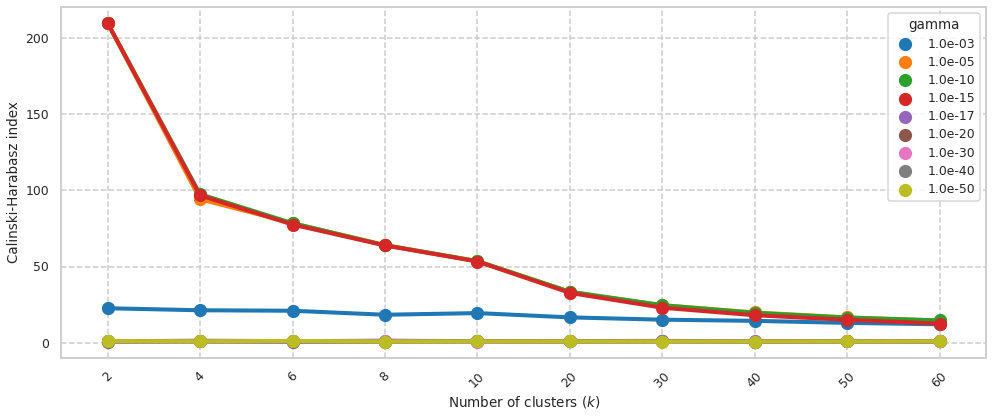

In [46]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score", hue="gamma")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [47]:
parts = ensemble.groupby(["gamma", "n_clusters"]).apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [48]:
parts.shape

(90,)

In [49]:
parts.head()

gamma    n_clusters
1.0e-03  2             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         4             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         6             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         8             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         10            [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
dtype: object

In [50]:
parts.iloc[0].shape

(5, 3749)

In [51]:
assert np.all(
    [
        parts.loc[k].shape == (int(CLUSTERING_OPTIONS["N_REPS_PER_K"]), data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [52]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import squareform, pdist

In [53]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="n_clusters"
)

In [54]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

1.0e-03  2     1.000000
         40    1.000000
1.0e-10  2     1.000000
1.0e-05  8     1.000000
         4     1.000000
1.0e-10  6     1.000000
1.0e-05  2     1.000000
1.0e-10  4     1.000000
1.0e-03  10    1.000000
         4     1.000000
         6     1.000000
         8     1.000000
1.0e-10  8     0.999297
1.0e-15  2     0.996823
1.0e-05  10    0.995167
Name: n_clusters, dtype: float64

In [55]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)
parts_ari_df.index.rename(["gamma", "n_clusters"], inplace=True)

In [56]:
parts_ari_df.shape

(90, 10)

In [57]:
_n_total_parts = int(
    CLUSTERING_OPTIONS["N_REPS_PER_K"]
)  # * len(CLUSTERING_OPTIONS["GAMMAS"]))

assert int(_n_total_parts * (_n_total_parts - 1) / 2) == parts_ari_df.shape[1]

In [58]:
parts_ari_df.head()

0    1    2    3    4    5    6    7    8    9
gamma   n_clusters                                                  
1.0e-03 2           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        4           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        6           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        8           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        10          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

## Stability plot

In [59]:
parts_ari_df_plot = (
    parts_ari_df.stack().reset_index().rename(columns={"level_2": "idx", 0: "ari"})
)

In [60]:
parts_ari_df_plot.dtypes

gamma          object
n_clusters      int64
idx             int64
ari           float64
dtype: object

In [61]:
parts_ari_df_plot.head()

,gamma,n_clusters,idx,ari
0,1.0e-03,2,0,1.0
1,1.0e-03,2,1,1.0
2,1.0e-03,2,2,1.0
3,1.0e-03,2,3,1.0
4,1.0e-03,2,4,1.0


In [62]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = parts_ari_df_plot.groupby(["n_clusters", "gamma"]).mean()
    display(_df)

idx       ari
n_clusters gamma                 
2          1.0e-03  4.5  1.000000
           1.0e-05  4.5  1.000000
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.996823
           1.0e-17  4.5 -0.003473
           1.0e-20  4.5 -0.000883
           1.0e-30  4.5 -0.002913
           1.0e-40  4.5  0.006222
           1.0e-50  4.5 -0.000429
4          1.0e-03  4.5  1.000000
           1.0e-05  4.5  1.000000
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.955537
           1.0e-17  4.5 -0.006621
           1.0e-20  4.5  0.001797
           1.0e-30  4.5  0.001877
           1.0e-40  4.5  0.010926
           1.0e-50  4.5  0.005906
6          1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.965708
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.912725
           1.0e-17  4.5 -0.005134
           1.0e-20  4.5  0.000978
           1.0e-30  4.5  0.003517
           1.0e-40  4.5  0.001121
           1.0e-50  4.5  0.005875
8          1.0e-03  4.5  1.000000
           1.0e-05  4.5  1.000000
           1.0e-10  4.5  0.999297
           1.0e-15  4.5  0.897819
           1.0e-17  4.5 -0.004462
           1.0e-20  4.5 -0.005396
           1.0e-30  4.5  0.006540
           1.0e-40  4.5  0.001856
           1.0e-50  4.5 -0.001691
10         1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.995167
           1.0e-10  4.5  0.991779
           1.0e-15  4.5  0.584365
           1.0e-17  4.5  0.002402
           1.0e-20  4.5 -0.003229
           1.0e-30  4.5  0.003600
           1.0e-40  4.5  0.002391
           1.0e-50  4.5 -0.001431
20         1.0e-03  4.5  0.879979
           1.0e-05  4.5  0.593919
           1.0e-10  4.5  0.466322
           1.0e-15  4.5  0.097219
           1.0e-17  4.5 -0.001667
           1.0e-20  4.5 -0.001352
           1.0e-30  4.5  0.000829
           1.0e-40  4.5 -0.000408
           1.0e-50  4.5  0.001220
30         1.0e-03  4.5  0.977300
           1.0e-05  4.5  0.270448
           1.0e-10  4.5  0.331568
           1.0e-15  4.5  0.037448
           1.0e-17  4.5  0.004039
           1.0e-20  4.5 -0.001232
           1.0e-30  4.5  0.001966
           1.0e-40  4.5 -0.004353
           1.0e-50  4.5  0.003151
40         1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.160639
           1.0e-10  4.5  0.181697
           1.0e-15  4.5  0.032380
           1.0e-17  4.5  0.003382
           1.0e-20  4.5 -0.001444
           1.0e-30  4.5  0.000805
           1.0e-40  4.5  0.004182
           1.0e-50  4.5 -0.001834
50         1.0e-03  4.5  0.961422
           1.0e-05  4.5  0.124132
           1.0e-10  4.5  0.114571
           1.0e-15  4.5  0.029839
           1.0e-17  4.5 -0.000022
           1.0e-20  4.5  0.000376
           1.0e-30  4.5 -0.000043
           1.0e-40  4.5  0.006970
           1.0e-50  4.5  0.002384
60         1.0e-03  4.5  0.141450
           1.0e-05  4.5  0.094678
           1.0e-10  4.5  0.094576
           1.0e-15  4.5  0.027717
           1.0e-17  4.5  0.003246
           1.0e-20  4.5 -0.002344
           1.0e-30  4.5  0.002566
           1.0e-40  4.5 -0.000865
           1.0e-50  4.5  0.005663

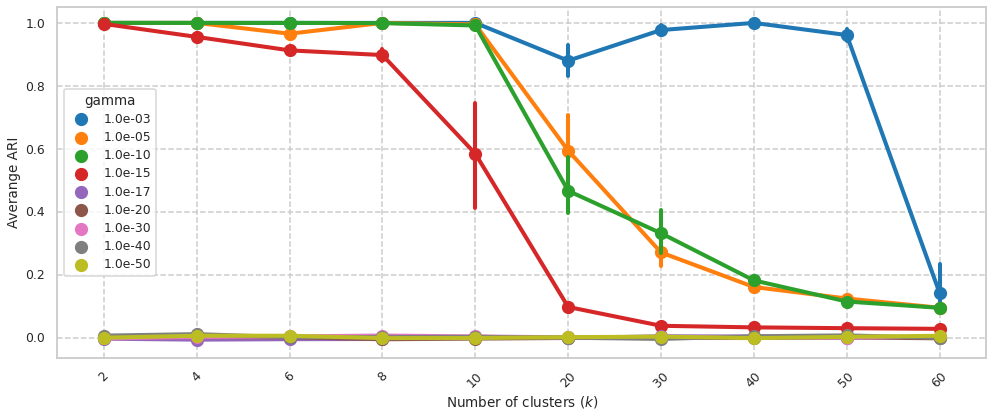

In [63]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="n_clusters", y="ari", hue="gamma")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()